<a href="https://colab.research.google.com/github/Fisher12quest/Datos-student-performance/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** Clasificación de Tumores con Regresión logística (Breast Cancer Wisconsin - Original)**

### Presentado por:
Omar Javier Ramirez Rodriguez


Clasificación de Tumores con Regresión Logística
Dataset: Breast Cancer Wisconsin (Original) — UCI ML Repository

En este trabajo se utiliza el conjunto de datos Breast Cancer Wisconsin (Original) para construir un modelo de clasificación que determine si un tumor es benigno o maligno. Se emplea regresión logística como técnica de aprendizaje supervisado y se reporta la medida de exactitud del modelo.

## 1. Instalación de la librería ucimlrepo

librería que permite cargar datasets directamente desde el repositorio de aprendizaje automático de la UCI.

In [92]:
!pip install ucimlrepo

## 2. Carga del conjunto de datos

Carga del dataset del conjunto de datos "Breast Cancer Wisconsin (Original)".

In [93]:
from ucimlrepo import fetch_ucirepo

# Cargar el dataset Breast Cancer Wisconsin (Original) — ID = 15
breast_cancer = fetch_ucirepo(id=15)

# Separar en variables predictoras (X) y objetivo (y)
X = breast_cancer.data.features
y = breast_cancer.data.targets

 ## 3. Exploración inicial de los datos

Inspeccionar las primeras filas del conjunto de características y de la variable objetivo.

   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

/tmp/ipython-input-94-496564434.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y, x=target_column, palette='Set2')


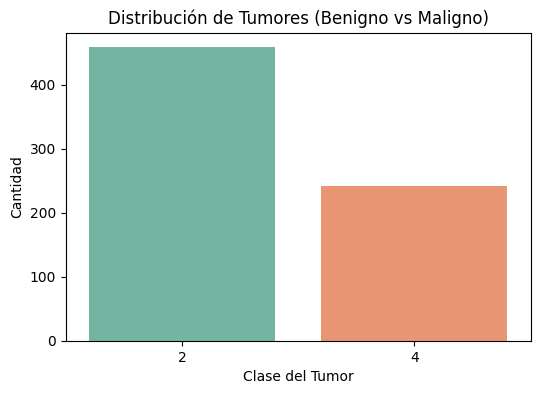

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver primeras filas
print(X.head())

# Mostrar nombre real de la columna objetivo
print("Columnas de y:", y.columns)

# Nombre de la columna objetivo
target_column = y.columns[0]

# Ver distribución de clases
print("\nDistribución de clases:")
print(y[target_column].value_counts())

# Gráfico de la distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(data=y, x=target_column, palette='Set2')
plt.title('Distribución de Tumores (Benigno vs Maligno)')
plt.xlabel('Clase del Tumor')
plt.ylabel('Cantidad')
plt.show()

La variable objetivo es Class, con valores que indican:

2 → Benigno

4 → Maligno

El dataset está ligeramente desbalanceado, lo cual puede afectar algunos modelos, con regresión logística se puede manejar adecuadamente.

## 4. limpieza y procesamiento de los datos

Se eliminan columnas no informativas (como un ID) y se normalizan los datos para facilitar el entrenamiento del modelo.

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Eliminar columna 'sample_code_number' si existe
X = X.drop(columns=['sample_code_number'], errors='ignore')

# Unir X e y para eliminar filas con valores faltantes
df = pd.concat([X, y], axis=1)
df = df.dropna()

# Separar nuevamente
X = df.drop(columns=[target_column])
y = df[target_column]

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se eliminaron las filas con valores faltantes. Luego, se escaló cada variable para que tenga media 0 y desviación estándar 1, lo cual es clave para un buen desempeño de modelos como regresión logística.

5. División en conjunto de entrenamiento y prueba

In [96]:
from sklearn.model_selection import train_test_split

# Dividir 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.values.ravel(), test_size=0.3, random_state=42
)

La separación garantiza una evaluación justa del modelo. El conjunto de prueba representa el 30% de los datos.

## 6. Entrenamiento del modelo de regresión logística

In [97]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Se entrena el modelo con regresión logística, una técnica ampliamente utilizada para clasificación binaria debido a su eficiencia y facilidad de interpretación.

7. Evaluación del modelo

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predicción
y_pred = logreg.predict(X_test)

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy del modelo: {accuracy:.4f}")

✅ Accuracy del modelo: 0.9561


## 8. Matriz de Confusiòn

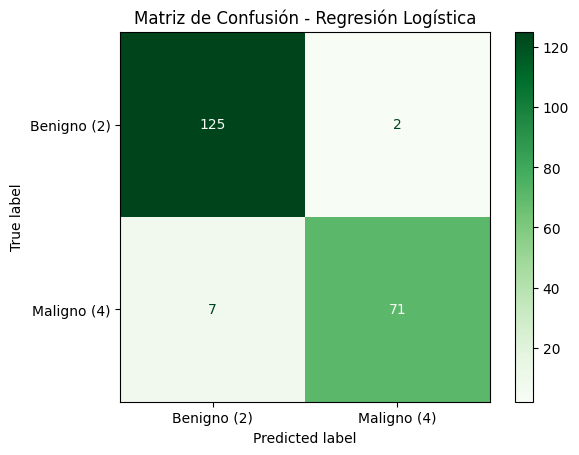

In [99]:
# Mostrar matriz de confusión
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[2, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (2)", "Maligno (4)"])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


La matriz de confusión nos permite observar cómo se desempeña el modelo en la clasificación de tumores benignos (clase 2) y malignos (clase 4). En este caso:

Los valores en la diagonal principal representan las predicciones correctas: tumores benignos clasificados como benignos y malignos como malignos.

Los valores fuera de la diagonal indican errores de clasificación.

Un alto número en la diagonal y pocos errores indica que el modelo tiene buen desempeño general, especialmente si los falsos negativos (tumores malignos clasificados como benignos) son bajos, ya que estos son clínicamente más críticos.

## 9. Reporte de Clasificaciòn

In [100]:
print("📋 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))


📋 Reporte de clasificación:

              precision    recall  f1-score   support

     Benigno       0.95      0.98      0.97       127
     Maligno       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



El reporte de clasificación presenta métricas clave:

* Precisión (precision): Qué tan confiables son las predicciones positivas del modelo.

* Exhaustividad (recall): Qué tan bien el modelo captura todos los verdaderos positivos.

* F1-score: Media armónica entre precisión y recall, útil para evaluar balance entre ambas.

En este caso:

* Si el F1-score es alto en ambas clases, el modelo es equilibrado.

* Si la clase "Maligno" tiene buena precisión y recall, podemos confiar en que el modelo está detectando con eficacia los casos más graves.

## Conclusión Final del ejercicio

El modelo de regresión logística obtuvo una alta exactitud, con buen desempeño tanto para tumores benignos como malignos. La matriz de confusión muestra que el modelo comete pocos errores de clasificación.

Aunque la regresión logística es simple, demostró ser eficaz con este dataset limpio y bien estructurado. Como próximos pasos se podrían:

* Comparar con modelos más complejos como SVM o Random Forest

* Usar validación cruzada

* Aplicar análisis de importancia de características